# Mögliche verbesserungen
- Observation space ausprobieren:
  - Marketload
    - Durchschnittlicher Marktpreis der letzten 10 Runden

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

from marketenvironment import MarketEnvironment
from plots import plot_q_tables, plot_rewards, plot_reward_for

# RL-Environment

In [2]:
def run_episode(sim_env: MarketEnvironment, max_steps: int):
    states = sim_env.reset()
    done = False
    step_count = 0

    rewards_info = {}

    while not done and step_count < max_steps:
        # print(f"--- Step {step_count} ---")
        actions = {}
        for agent in sim_env.agents.values():
            actions[agent.name] = agent.choose_action(states[agent.name])

        next_state, rewards, done, info = sim_env.step(actions)

        rewards_info[step_count] = rewards
        rewards_info[step_count]["mean_reward"] = sum(rewards.values()) / len(rewards.keys())
        rewards_info[step_count]["social_welfare"] = sum(rewards.values())

        for agent in sim_env.agents.values():
            agent.learn(
                states[agent.name], actions[agent.name],
                rewards[agent.name], next_state[agent.name]
            )

        states = next_state
        step_count += 1

    return sim_env, rewards_info

In [3]:
sim_env = MarketEnvironment(num_agents=6, costs=5, sigma=2)
steps = 8000
print(f"Running simulation for {steps} steps...")
sim_env, rewards_info = run_episode(sim_env=sim_env, max_steps=steps)

Running simulation for 8000 steps...


Plotting Q-Tables
Agent RZ1


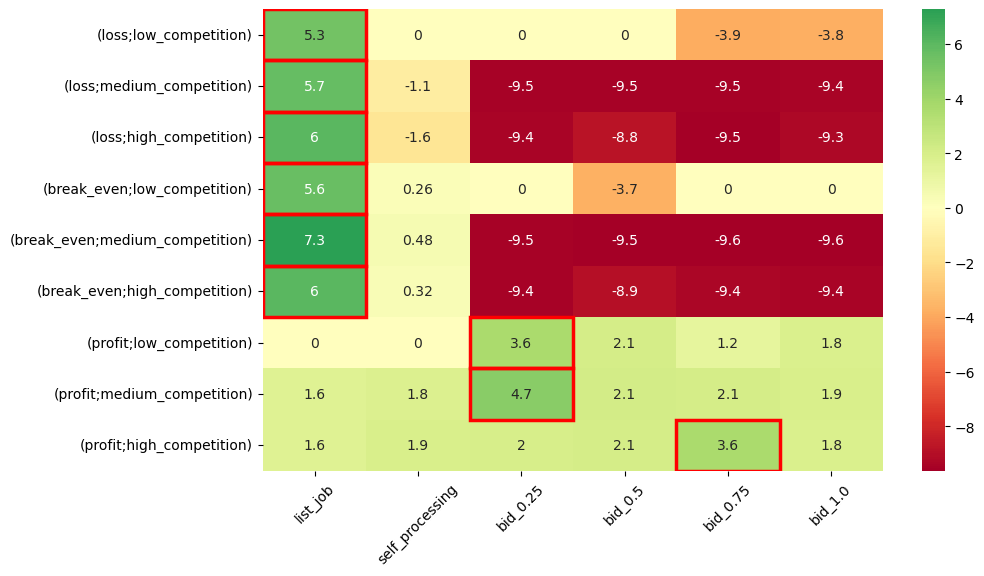

Agent RZ2


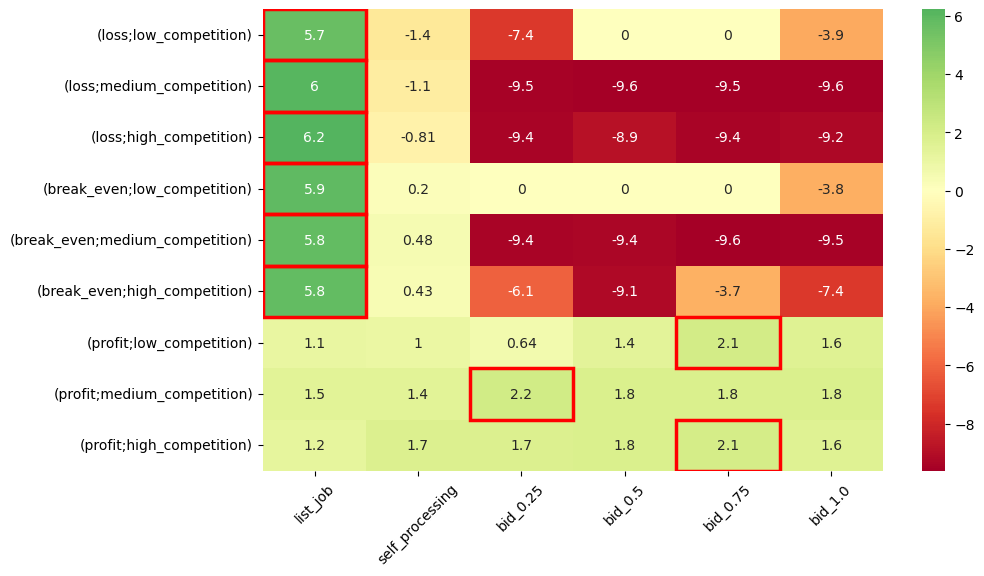

Agent RZ3


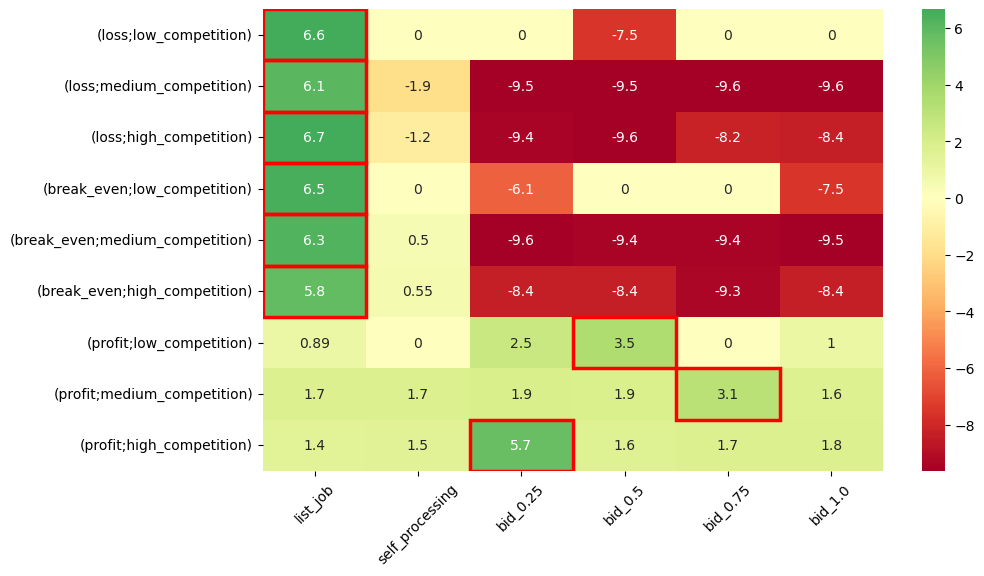

Agent RZ4


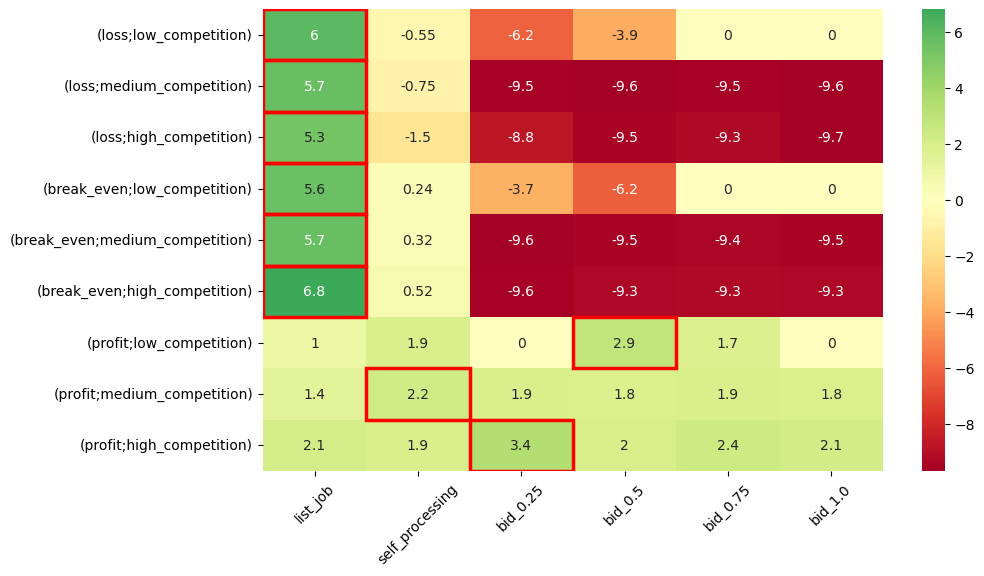

Agent RZ5


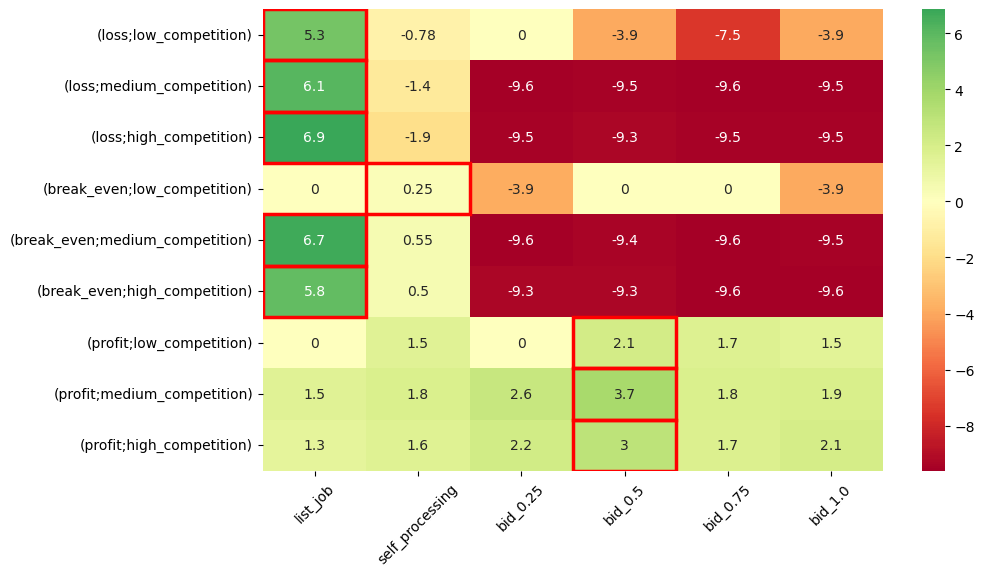

Agent RZ6


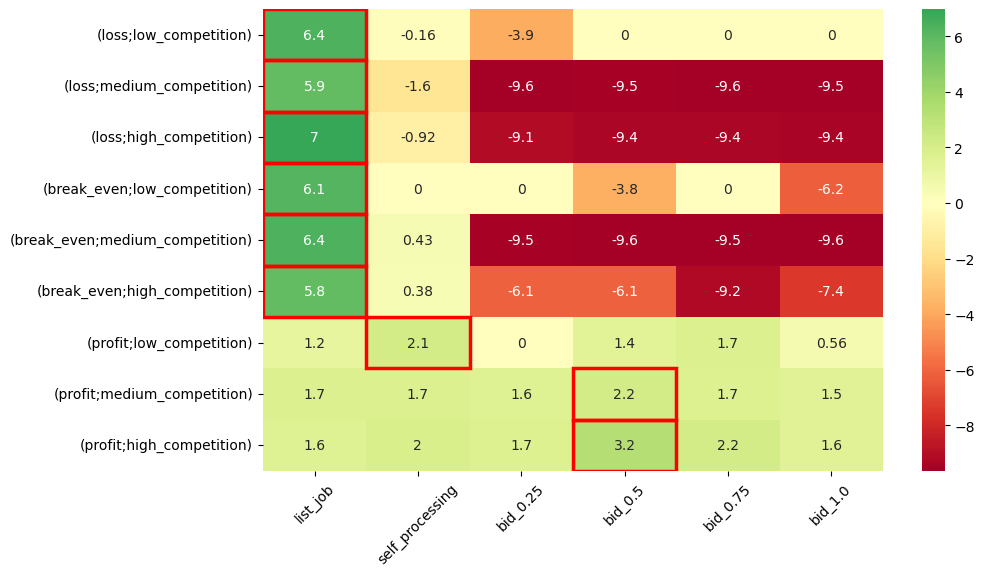

Plotting Rewards


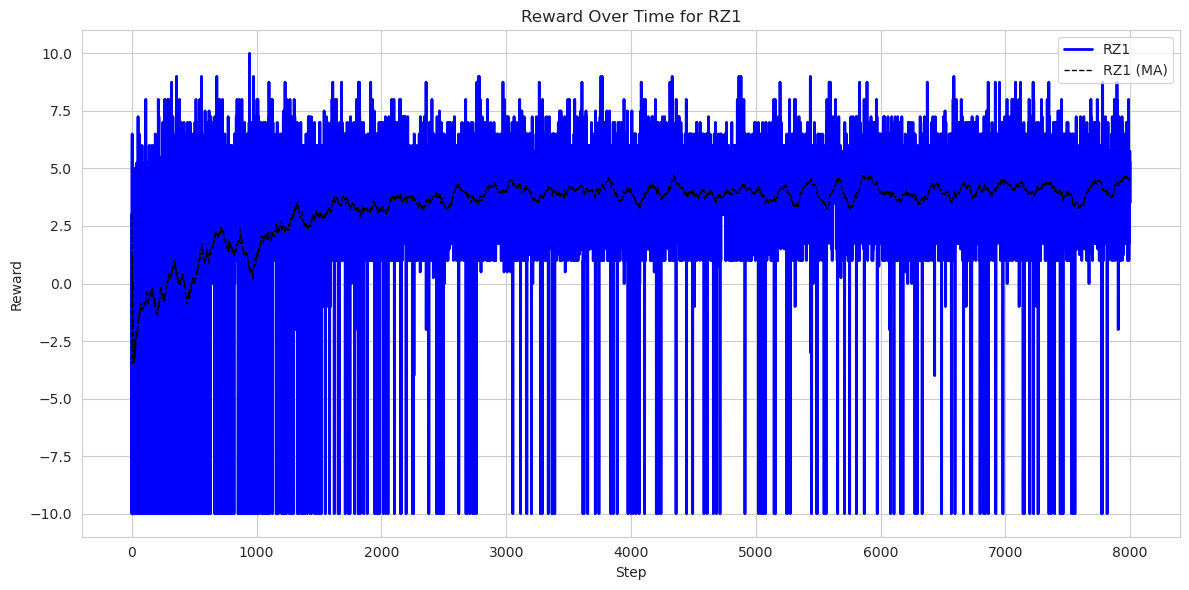

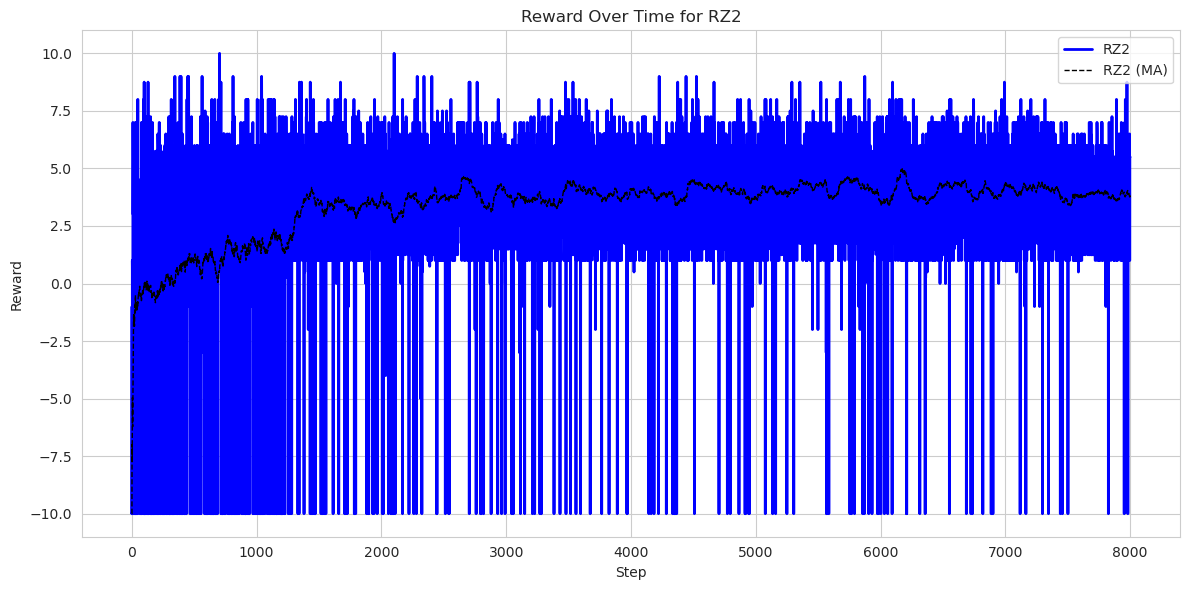

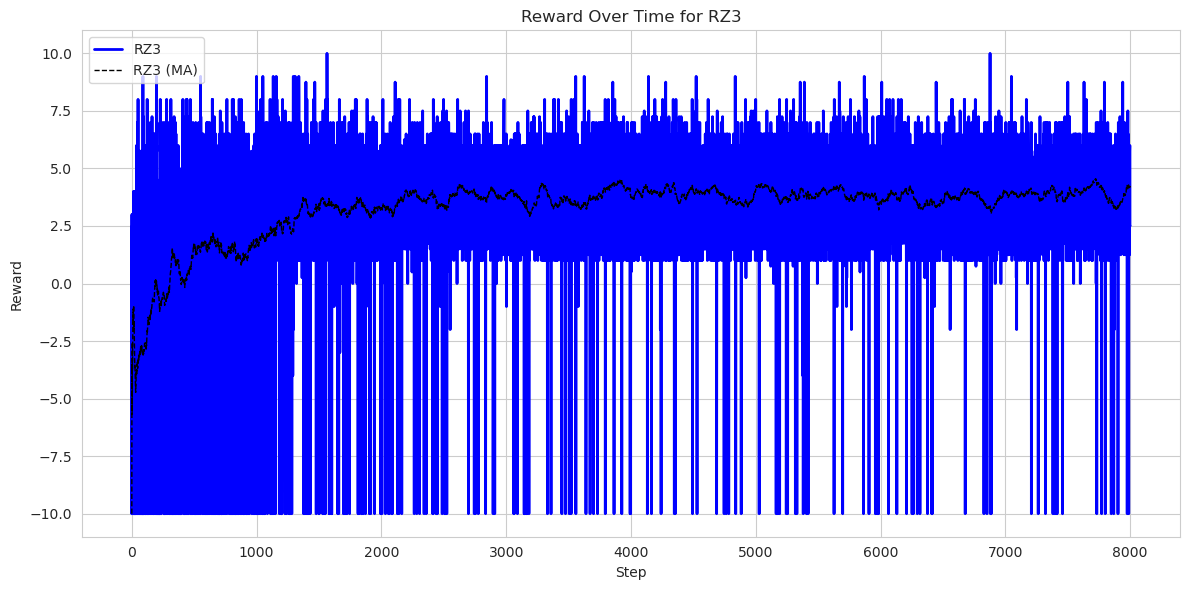

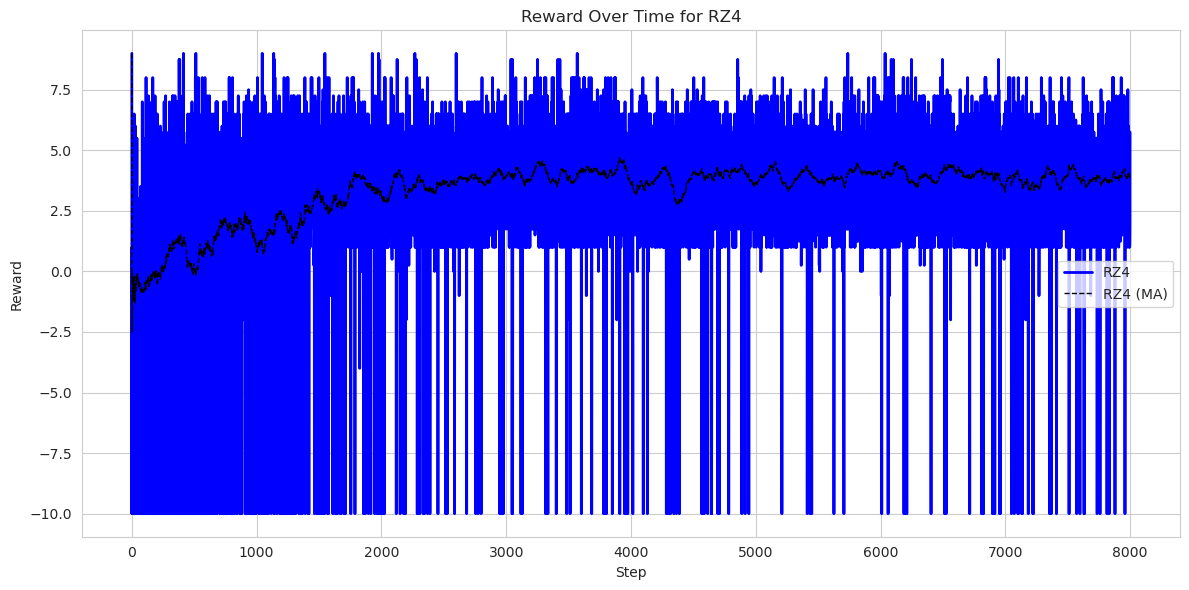

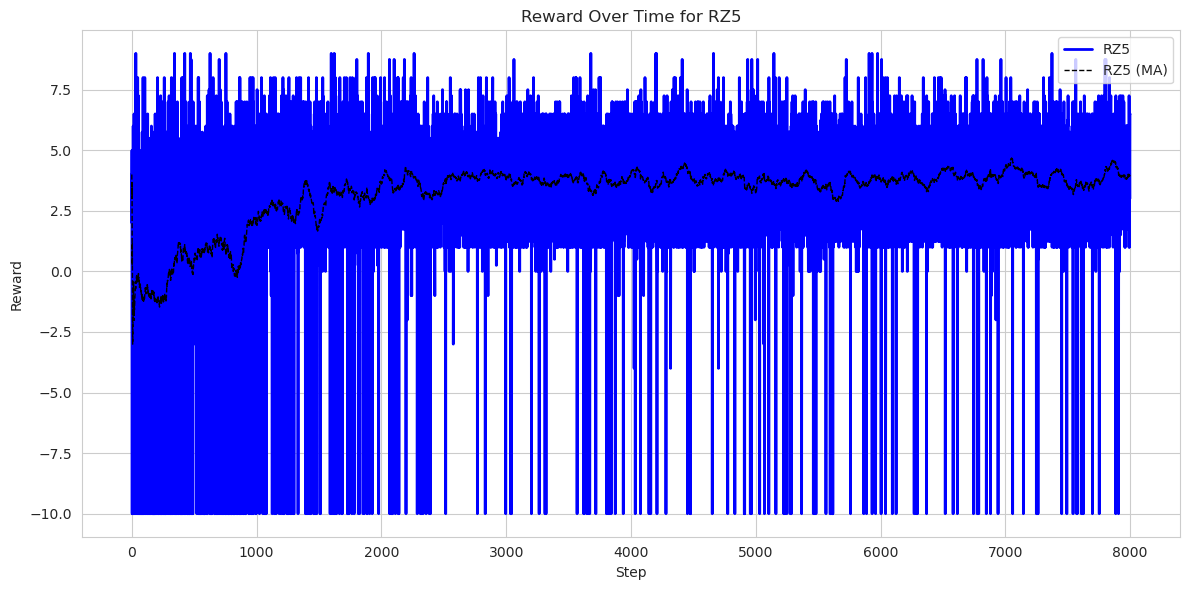

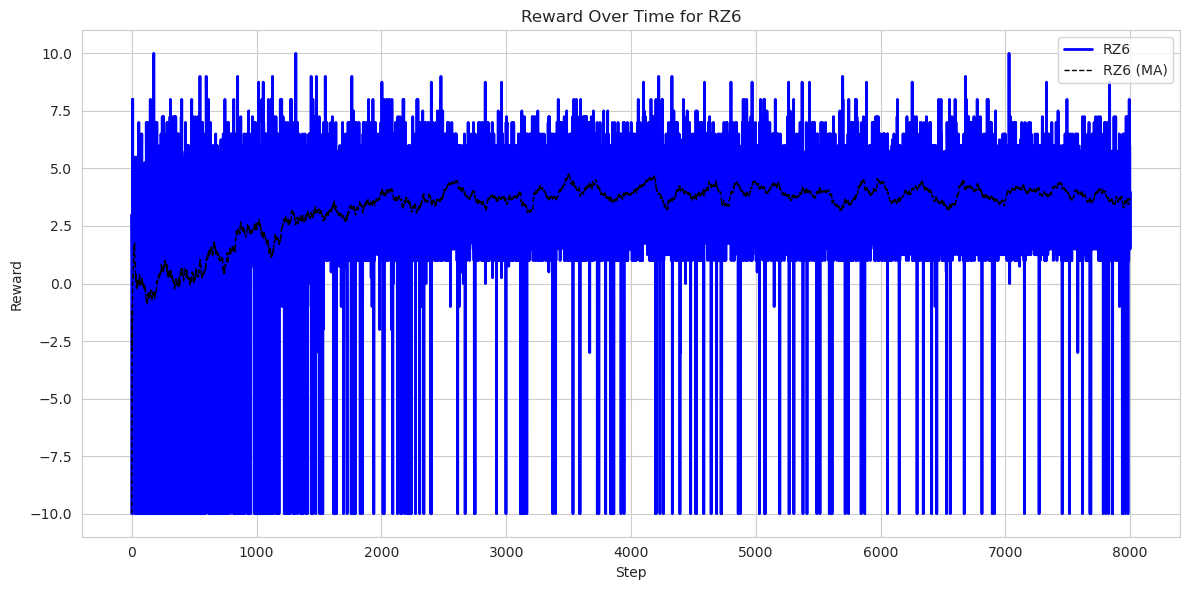

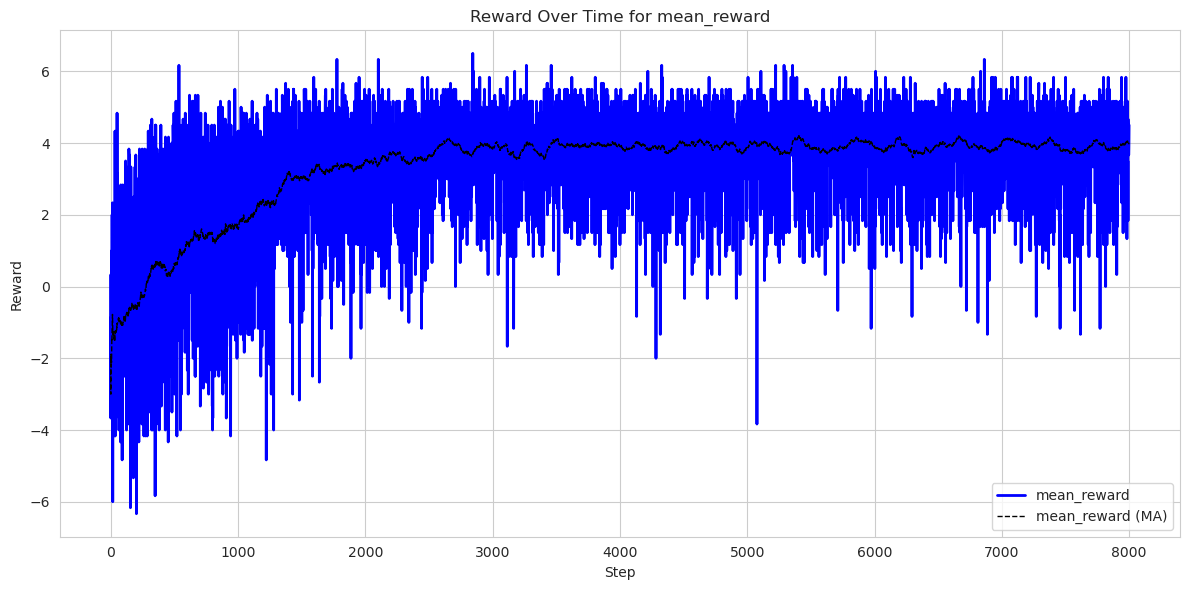

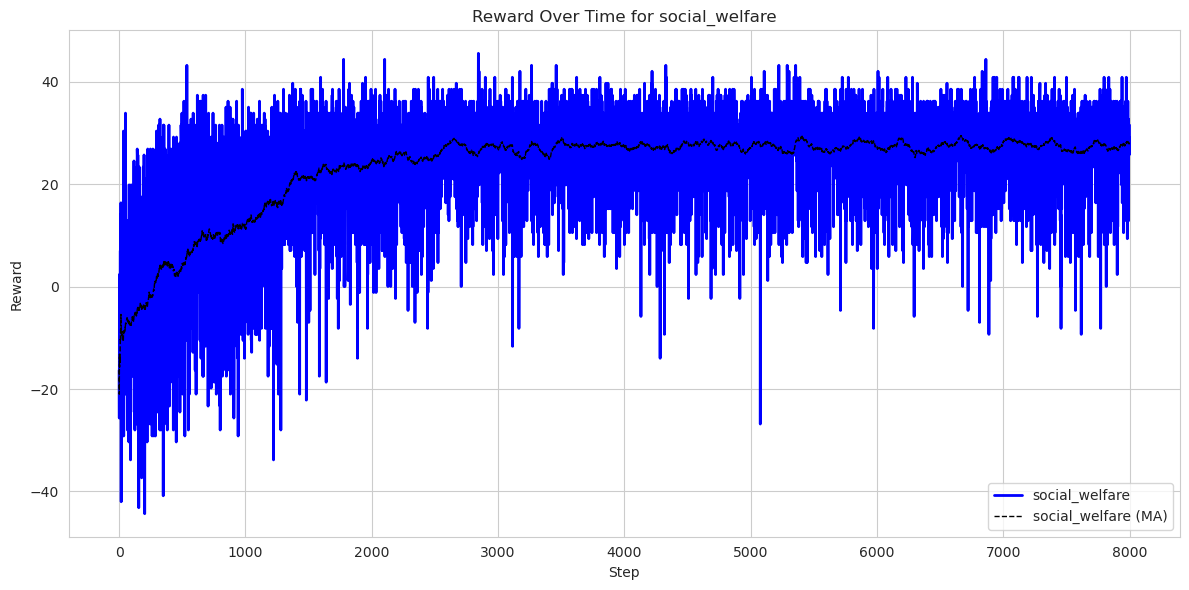

In [4]:
print("Plotting Q-Tables")
for agent in sim_env.agents.values():
    print(f"Agent {agent.name}")
    plot_q_tables(agent)

print("Plotting Rewards")
for agent in sim_env.agents.values():
    plot_reward_for(agent.name, rewards_info)

plot_reward_for("mean_reward", rewards_info)
plot_reward_for("social_welfare", rewards_info)

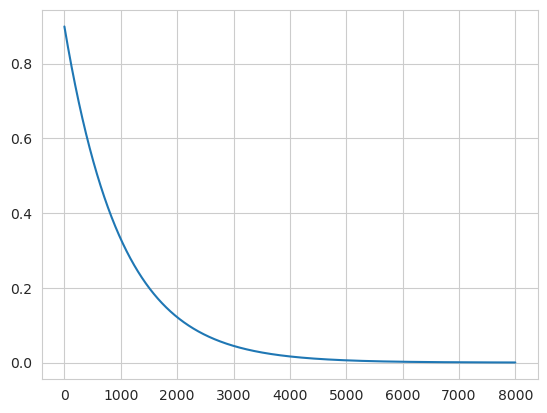

In [5]:
epsilon = 0.9
eps = {}

for step in range(steps):
    epsilon *= 0.999
    eps[step] = epsilon

value = [value for value in eps.values()]

plt.plot(eps.keys(), value)